### Carregamento das libs

In [1]:
from src.libs.lib import *
import pandas as pd
import matplotlib.pyplot as plt
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

Hash numérica de 5 dígitos: 94799


# df_original

In [2]:
df_original = pd.read_csv("src/data/remocao_dias_retroativos.csv")
df_original = df_original.loc[:, ~df_original.columns.str.contains('^Unnamed')] 
df_original = df_original.dropna()
df_original.head()

,created_at,freight_id,driver_id,tipo,dias_reducao,nivel_px
0,2025-04-13 11:30:28.000,157847,317998,Diária,1.0,Ouro
1,2025-04-12 11:46:22.000,157728,221202,Diária,1.0,Ouro
2,2025-04-11 10:06:48.000,157297,2597,Diária,8.0,Diamante
3,2025-04-11 08:40:21.000,157242,21660,Coleta/Entrega,1.0,Ouro
4,2025-04-10 19:48:59.000,157178,218039,Coleta/Entrega,1.0,Ouro


In [3]:
df_original['created_at'] = pd.to_datetime(df_original['created_at'])

df_original['ano_mes'] = df_original['created_at'].dt.to_period('M').dt.to_timestamp()

df_original = df_original.drop(columns=['created_at'])

df_original.head()

,freight_id,driver_id,tipo,dias_reducao,nivel_px,ano_mes
0,157847,317998,Diária,1.0,Ouro,2025-04-01
1,157728,221202,Diária,1.0,Ouro,2025-04-01
2,157297,2597,Diária,8.0,Diamante,2025-04-01
3,157242,21660,Coleta/Entrega,1.0,Ouro,2025-04-01
4,157178,218039,Coleta/Entrega,1.0,Ouro,2025-04-01


<Axes: >

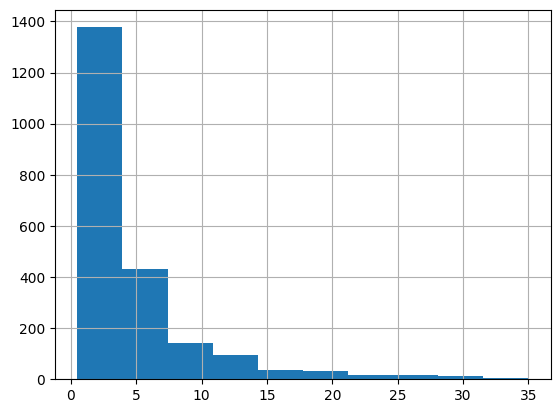

In [4]:
df_original.dias_reducao.hist()

In [5]:
df_original.dias_reducao.describe()

count    2169.000000
mean        4.365376
std         5.338504
min         0.500000
25%         1.000000
50%         2.000000
75%         5.000000
max        35.000000
Name: dias_reducao, dtype: float64

In [6]:
df_original.ano_mes.value_counts()

ano_mes
2025-01-01    455
2025-03-01    402
2025-02-01    400
2024-12-01    378
2024-11-01    378
2024-10-01     92
2025-04-01     55
2024-09-01      9
Name: count, dtype: int64

In [7]:
df_original.tipo.value_counts()

tipo
Diária            1785
Coleta/Entrega     374
Ajudante            10
Name: count, dtype: int64

In [8]:
df_original.nivel_px.value_counts()

nivel_px
Ouro        983
Diamante    661
Prata       423
Bronze      102
Name: count, dtype: int64

In [9]:
df_original.dias_reducao.describe()

count    2169.000000
mean        4.365376
std         5.338504
min         0.500000
25%         1.000000
50%         2.000000
75%         5.000000
max        35.000000
Name: dias_reducao, dtype: float64

In [10]:
df_original = df_original[['ano_mes', 'freight_id','tipo', 'nivel_px', 'dias_reducao']]
df_original = df_original.loc[df_original.ano_mes != '2025-04-01']
df_original = df_original.loc[df_original.ano_mes != '2024-10-01']
df_original = df_original.loc[df_original.ano_mes != '2024-09-01']

In [11]:
df_original.to_csv("src/data/df_original.csv")

In [12]:
df_original.head()

,ano_mes,freight_id,tipo,nivel_px,dias_reducao
73,2025-03-01,154390,Diária,Prata,1.0
74,2025-03-01,154389,Diária,Prata,1.0
75,2025-03-01,154339,Diária,Prata,2.0
76,2025-03-01,154324,Coleta/Entrega,Bronze,1.0
77,2025-03-01,154314,Diária,Diamante,2.0


# df_all

In [13]:
df_houve_reducao = df_original.copy()
df_houve_reducao['houve_reducao'] = 'sim'
df_houve_reducao.head()

,ano_mes,freight_id,tipo,nivel_px,dias_reducao,houve_reducao
73,2025-03-01,154390,Diária,Prata,1.0,sim
74,2025-03-01,154389,Diária,Prata,1.0,sim
75,2025-03-01,154339,Diária,Prata,2.0,sim
76,2025-03-01,154324,Coleta/Entrega,Bronze,1.0,sim
77,2025-03-01,154314,Diária,Diamante,2.0,sim


In [14]:
df_all = pd.read_csv("src/data/all_contracts.csv")
df_all = df_all.loc[:, ~df_all.columns.str.contains('^Unnamed')] 
df_all = df_all.dropna()

df_all['created_at'] = pd.to_datetime(df_all['created_at'])

df_all['ano_mes'] = df_all['created_at'].dt.to_period('M').dt.to_timestamp()

df_all = df_all.drop(columns=['created_at'])

df_all.head()

,freight_id,driver_id,tipo,nivel_px,ano_mes
1,23068,29889,Diária,Ouro,2023-05-01
2,11319,26879,Diária,Diamante,2022-11-01
3,11320,12224,Diária,Ouro,2022-11-01
4,8436,18608,Diária,Ouro,2022-09-01
5,11321,12623,Diária,Ouro,2022-11-01


In [16]:
# Merge usando left join pelas colunas especificadas
df_comparativo = df_all.merge(
    df_houve_reducao,
    how='left',
    on=['ano_mes', 'freight_id', 'tipo', 'nivel_px']
)

# Remover a coluna driver_id, se existir
if 'driver_id' in df_comparativo.columns:
    df_comparativo = df_comparativo.drop(columns=['driver_id'])

# Preencher valores nulos na coluna houve_reducao com 'nao'
df_comparativo['houve_reducao'] = df_comparativo['houve_reducao'].fillna('nao')

df_comparativo = df_comparativo[['ano_mes', 'tipo', 'nivel_px', 'houve_reducao']]
df_comparativo

,ano_mes,tipo,nivel_px,houve_reducao
0,2023-05-01,Diária,Ouro,nao
1,2022-11-01,Diária,Diamante,nao
2,2022-11-01,Diária,Ouro,nao
3,2022-09-01,Diária,Ouro,nao
4,2022-11-01,Diária,Ouro,nao
...,...,...,...,...
104126,2025-04-01,Coleta/Entrega,Ouro,nao
104127,2025-04-01,Coleta/Entrega,Diamante,nao
104128,2025-04-01,Coleta/Entrega,Bronze,nao
104129,2025-04-01,Coleta/Entrega,Diamante,nao
